In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
f = open("semeion.data")
L = f.readlines()

In [5]:
array = []
label = [] 
for l in L:
    array.append(list(map(float,l[:-21].split())))
    label.append(list(map(int,l[-21:].split())))

In [6]:
train = np.array(array)
label = np.array(label)

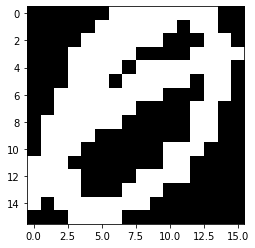

In [7]:
img = train[0]
img = img.reshape(16,16,1)
plt.imshow(img,cmap='gray')

In [8]:
print(train.shape)
print(label.shape)
print(label[0])

(1593, 256)
(1593, 10)
[1 0 0 0 0 0 0 0 0 0]


In [9]:
labelS = []
for l in label:
    l = list(l)
    labelS.append(l.index(1))

In [10]:
labelS = np.array(labelS)
labelS = labelS.reshape(1593,1)

In [11]:
print(train.shape)
print(labelS.shape)

(1593, 256)
(1593, 1)


In [34]:
#Creation of discerning matrix
def discernilibityMatrix(att,lab):
    matrix = []
    for i in range(len(att)):
        if(i in [int(len(att)/10)*n for n in range(1,11)]):
            print("{:d}% completed".format(int(i/len(att)*100)+1))
        for j in range(i,len(att)):
            aux = []
            if(lab[i]!=lab[j]):
                for k in range(len(att[0])):
                    if(att[i][k] == att[j][k]):
                        aux.append(0)
                    else:
                        aux.append(1)
                matrix.append(aux)
    print("Completed")
    return np.array(matrix,dtype=np.uint32)

In [35]:
dMat = discernilibityMatrix(train,labelS)

10% completed
20% completed


KeyboardInterrupt: 

In [95]:
#Reduction to basic matrix
def baseMatrix(dis):
    x = dis
    i = 0
    while True:
        if(i in [int(len(dis)/10)*n for n in range(1,11)]):
            print("{:d}% completed".format(int(i/len(dis)*100)+1))
        #check if full of ceros
        if(not np.any(x[i])):
            x = np.delete(x,i,0)
            continue
        else:
            it = i + 1
            while True:
                if(np.all(x[i]<=x[it])):
                    print("trigger")
                    x = np.delete(x,it,0)
                elif(np.all(x[i]>x[it])):
                    print("trigger2")
                    x = np.delete(x,i,0)
                    break
                else:
                    it+=1
                if(it>=len(x)):
                    i+= 1
                    break
        if(i>=len(x)):
            break
    print("Completed")
    return x

In [92]:
a = np.array([0,1,0,1,1])
b = np.array([0,1,0,1,0])
c = np.array([1,0,1,1,1])
x = np.array([a,b,c])
l = np.array([1,0,1])
d = discernilibityMatrix(x,l)
print(d)

1% completed
Completed
[[0 0 0 0 1]
 [1 1 1 0 1]]


In [96]:
print(dMat.shape)

(1141923, 256)


In [ ]:
bMat = baseMatrix(dMat)

In [81]:
x = dMat[0]
y = np.delete(dMat,0,0)
x == y[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,